/Users/busko/Projects/miniconda3/envs/specut/lib/python3.7/site-packages/astropy/modeling/powerlaws.py:53: RuntimeWarning: divide by zero encountered in power
  return amplitude * xx ** (-alpha)
/Users/busko/Projects/miniconda3/envs/specut/lib/python3.7/site-packages/astropy/modeling/powerlaws.py:61: RuntimeWarning: divide by zero encountered in power
  d_amplitude = xx ** (-alpha)
/Users/busko/Projects/miniconda3/envs/specut/lib/python3.7/site-packages/astropy/modeling/powerlaws.py:63: RuntimeWarning: divide by zero encountered in log
  d_alpha = -amplitude * d_amplitude * np.log(xx)


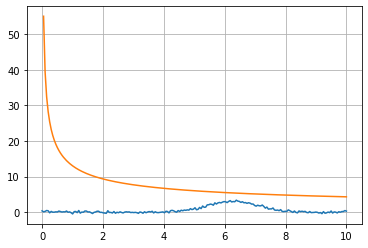

In [1]:
# Proof-of concept.
#
# We cannot use Kriss' example directly. Line fitting in specutils 
# does not support bounds and ties, which are included in the 
# original model. Also, Kriss' model depends on some custom-
# defined model components such as ccm reddening and "bipolar"
# gaussian.
#
# For demo purposes, we can remove those custom componentsd and
# rewrite the model-defining module. 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.modeling import models
from astropy import units as u

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

# Create a simple spectrum with a Gaussian.
np.random.seed(0)
x = np.linspace(0., 10., 200)
y = 3 * np.exp(-0.5 * (x- 6.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)


# from custom_models import gaussian, powerlaw, ccmext

# model1 = \
#     powerlaw(name = 'powerlaw1',
#              amplitude =   6.586200E-14,
#              x_0 =   1000.0,
#              alpha = 0.4819233,
#              bounds = {'amp':   (0., 1.00E-11),
#                        'x_0':   (0., 1.00E-11),
#                        'alpha': (-5., 5.)},
#              fixed = {'x_0': True}
#              ) \
# + \
#     gaussian(name = 'C III 1176',
#              norm = 2.000000E-14,
#              mean = 1195.006,
#              fwhm = 861.4926,
#              bounds = {'norm': (0., 1.00E-10),
#                        'mean': (1000., 2000.),
#                        'fwhm': (1000., 2000.),
#                        'skew': (1., 1.)},
#              fixed = {'norm': True,
#                       'mean': True,
#                       'fwhm': True,
#                       'skew': True},
#              ) \

import astropy.modeling.models as models
model1 = models.PowerLaw1D(amplitude=6.,x_0=5.0,alpha = 0.4819233)

# Fit the spectrum and calculate the fitted flux values (``y_fit``)
g_init = models.Gaussian1D(amplitude=3.*u.Jy, mean=6.1*u.um, stddev=1.*u.um)
g_fit = fit_lines(spectrum, model1)
y_fit = g_fit(x*u.um)

# Plot the original spectrum and the fitted.
plt.plot(x, y)
plt.plot(x, y_fit)
# plt.title('Single fit peak')
plt.grid(True)
# plt.legend('Original Spectrum', 'Specutils Fit Result')